In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use("ggplot")

In [4]:
data_income = pd.read_csv("income.csv")

In [5]:
data_income.shape

(31978, 13)

In [6]:
data = data_income.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [8]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [9]:
data_income.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
data.describe(include = 'O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [11]:
data['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [13]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [14]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [15]:
data = pd.read_csv("income.csv",na_values = [" ?"])

In [16]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [17]:
data[data.isnull().any(axis=1)]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [18]:
data2 = data.dropna(axis=0)

In [19]:
data2.shape

(30162, 13)

In [20]:
data3 = data2[["age","capitalgain","capitalloss","hoursperweek"]]

In [21]:
data3.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [22]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [23]:
pd.crosstab(index = data2["gender"],
           columns = 'count',
           normalize = True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [24]:
pd.crosstab(index = data2['gender'],
           columns = data2['SalStat'],
           margins = True,
           normalize = 'index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


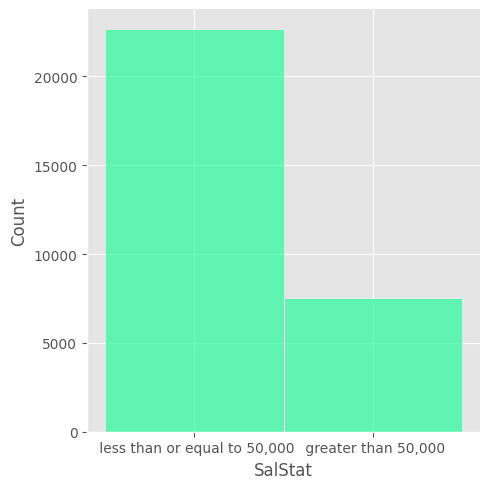

In [25]:
sns.displot(data2['SalStat'],color="#34faa3")

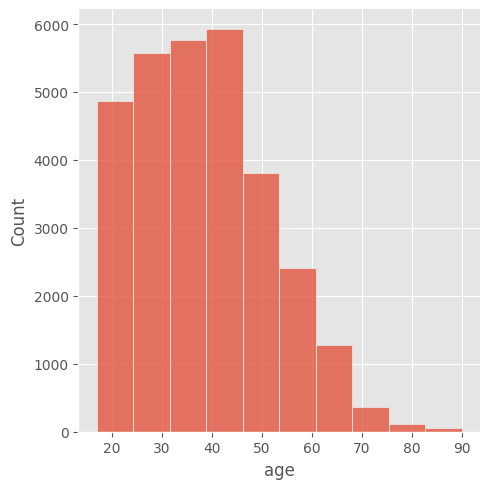

In [26]:
sns.displot(data2['age'],bins=10,kde=False)

<Axes: xlabel='SalStat', ylabel='age'>

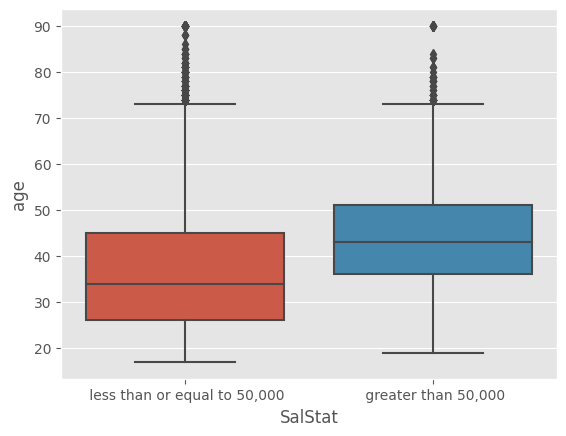

In [27]:
sns.boxplot(x = 'SalStat',y = 'age',data=data2)

In [28]:
data2.groupby("SalStat")["age"].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

In [29]:
pd.crosstab(index = data2['JobType'],
           columns = data2['SalStat'],
           margins = True,
           normalize = 'index')

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


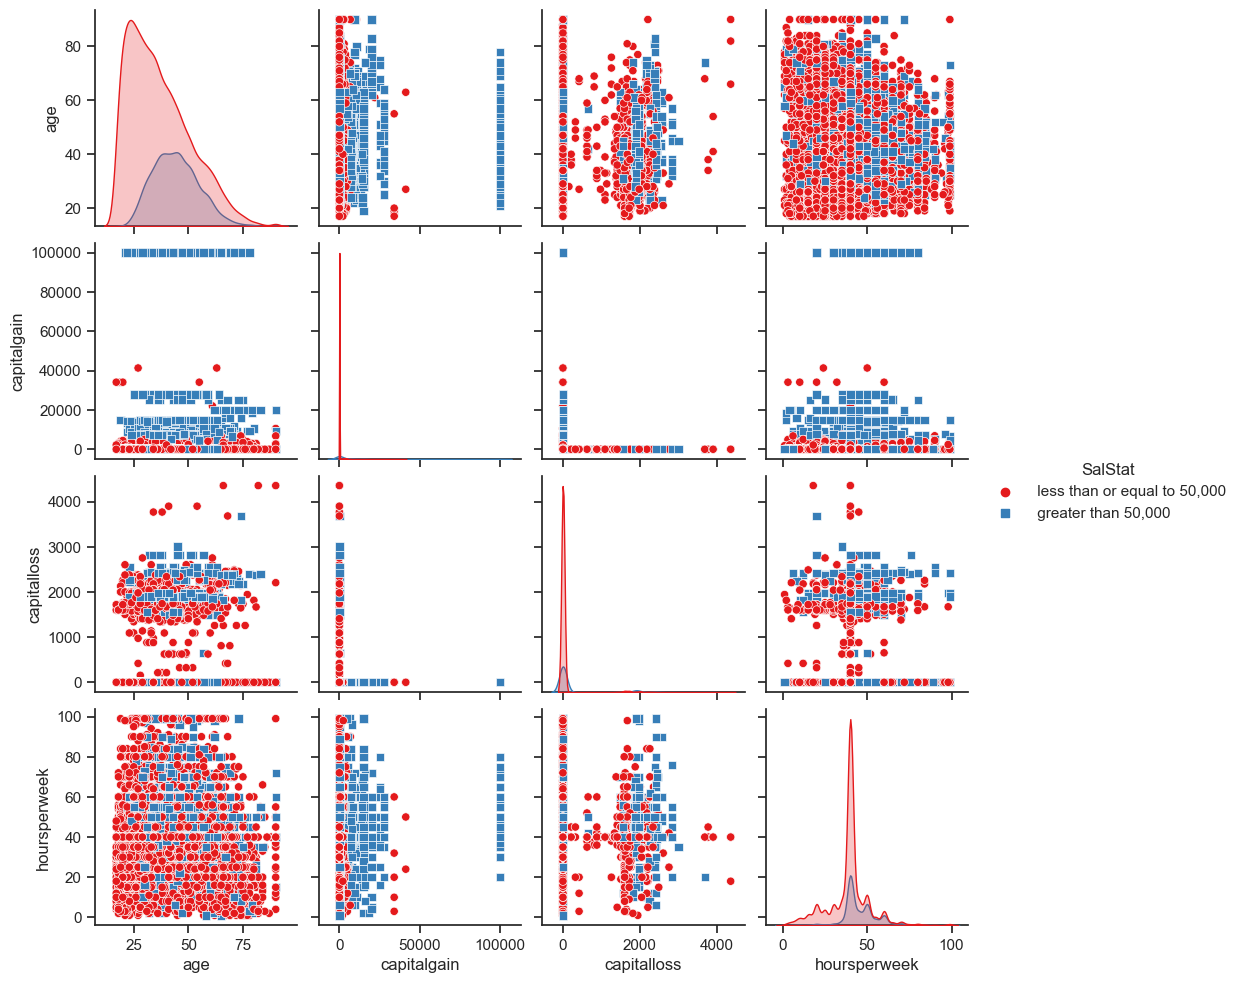

In [30]:
sns.set(style="ticks")  # Set style
pair_plot = sns.pairplot(data_income, hue="SalStat", diag_kind="kde", markers=["o", "s"], palette="Set1")
plt.show()

In [31]:
#LOGISTIC REGRESSION

In [32]:
data2["SalStat"] = data2["SalStat"].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data3 = data2.copy(deep=True)

In [33]:
data2["SalStat"].value_counts()

SalStat
0    22654
1     7508
Name: count, dtype: int64

In [34]:
new_data = pd.get_dummies(data2,drop_first = True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
columns_list = list(new_data.columns)

In [36]:
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [37]:
features = list(set(columns_list)-set(["SalStat"]))
features

['nativecountry_ Cuba',
 'nativecountry_ Hungary',
 'occupation_ Exec-managerial',
 'nativecountry_ Taiwan',
 'JobType_ Without-pay',
 'relationship_ Not-in-family',
 'nativecountry_ Ireland',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Jamaica',
 'EdType_ Bachelors',
 'race_ Other',
 'relationship_ Unmarried',
 'gender_ Male',
 'nativecountry_ Peru',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Laos',
 'nativecountry_ Hong',
 'occupation_ Transport-moving',
 'nativecountry_ Iran',
 'nativecountry_ El-Salvador',
 'EdType_ 12th',
 'nativecountry_ United-States',
 'nativecountry_ Canada',
 'EdType_ Masters',
 'nativecountry_ Columbia',
 'nativecountry_ Poland',
 'JobType_ Self-emp-inc',
 'maritalstatus_ Never-married',
 'maritalstatus_ Married-AF-spouse',
 'relationship_ Other-relative',
 'nativecountry_ Portugal',
 'nativecountry_ Yugoslavia',
 'JobType_ Local-gov',
 'nativecountry_ Greece',
 'EdType_ Assoc-acdm',
 'occupation_ Handlers-cleaners',
 'age',

In [38]:
y = new_data["SalStat"].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
x = new_data[features].values
x

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=object)

In [40]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [41]:
train_x.shape

(21113, 94)

In [42]:
test_x.shape

(9049, 94)

In [43]:
train_y.shape

(21113,)

In [44]:
test_y.shape

(9049,)

In [45]:
logistic = LogisticRegression()

In [46]:
logistic.fit(train_x,train_y)

LogisticRegression()

In [47]:
logistic.coef_

array([[-8.22641737e-03, -3.27915953e-03,  8.97110413e-01,
         1.91438555e-03, -8.14507354e-03, -4.94601693e-01,
        -3.88284706e-03, -5.83077736e-02, -1.19655303e-02,
         7.21369537e-01, -8.41324109e-02, -5.74731289e-01,
         1.62288899e-01, -1.20946026e-02, -7.43041910e-03,
        -6.16973664e-03, -1.28121516e-03, -1.95655050e-01,
        -2.73848457e-03, -3.97273043e-02, -9.58451128e-02,
        -4.22024773e-01,  3.58032761e-03,  5.26716580e-01,
        -2.02293877e-02, -9.37522344e-03,  1.60933171e-01,
        -1.34070230e+00,  1.65484066e-02, -2.44434350e-01,
        -1.37729688e-02, -5.34948194e-04, -2.49202068e-01,
        -8.36854550e-03, -5.97432589e-02, -3.39107008e-01,
        -6.20467041e-06,  6.69572987e-04, -1.18499460e-01,
        -3.21965962e-01, -2.24751150e-03, -3.94228276e-01,
        -1.29057940e-02, -1.90736156e-03,  9.90387911e-02,
        -9.71055364e-02, -3.91131672e-01, -1.43358537e-02,
         1.26926784e-02, -2.50655769e-01, -4.06007011e-0

In [48]:
logistic.intercept_

array([-1.03945193])

In [49]:
prediction = logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
confusion_matrix = confusion_matrix(test_y,prediction)
confusion_matrix

array([[6294,  529],
       [ 954, 1272]], dtype=int64)

In [51]:
# Accuracy Score
accuracy_score2 = accuracy_score(test_y,prediction)
accuracy_score2

0.8361144877887059

In [52]:
#Misclassified values from prediction
(test_y != prediction).sum() 

1483

In [53]:
#KNN - K-Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [55]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [56]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [57]:
prediction = KNN_classifier.predict(test_x)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
test_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
confusion_matrix2 = confusion_matrix(test_y,prediction)
confusion_matrix2

array([[6176,  647],
       [ 808, 1418]], dtype=int64)

In [60]:
# Accuracy Score
accuracy_score3 = accuracy_score(test_y, prediction)
print(accuracy_score3)

0.8392087523483258


In [61]:
#Misclassified values from prediction
(test_y != prediction).sum() 

1455

In [62]:
Misclassified_sample = []

In [63]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [66]:
print(Misclassified_sample)

[1766, 1516, 1522, 1437, 1455, 1455, 1456, 1452, 1481, 1432, 1465, 1446, 1451, 1435, 1421, 1415, 1435, 1423, 1443, 1429, 1433, 1409, 1415, 1420, 1446, 1427, 1423, 1421, 1434]


In [ ]:
#END